In [61]:
baseline_file_name = 'baseline.csv'
ps5_file_name = 'baseline_test.csv'
recovery_file_name = 'recovery241205.csv'

In [62]:
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
 
warnings.filterwarnings("ignore", category=FutureWarning)

TW = 8

M1 = 64
N1 = 64
M2 = 64
N2 = 64

# 阵列分区使用控制信号
seg_arr = False

In [63]:
# 判断阵列是否存在于硬件上
def judge_whether_arr_available(M, N):
    if M <= M1 and N == N1:
        return True
    elif M == M1 and N <= N1:
        return True
    elif M <= M2 and N == N2:
        return True
    elif M == M2 and N <= N2:
        return True
    else:
        return False

# 获得能耗计算矩阵
def get_energy_arr(M, N):
    if M == M1 and M != M2:
        return M1, N1
    if M == M2 and M != M1:
        return M2, N2
    if N == N1 and N != N2:
        return M1, N1
    if N == N2 and N != N1:
        return M2, N2
    if abs(M-M1) + abs(N-N1) < abs(M-M2) + abs(N-N2):
        return M1, N1
    else:
        return M2, N2
    
# 获得硬件上的所有可用矩阵（行或列至少有一个维度用满）
def get_all_available_arr(M1, N1, M2, N2):
    available_arr_list = []
    j = 1
    while j <= N1:
        available_arr_list.append([M1, j, [M1, N1]])
        j *= 2
    j = 1
    while j <= N2:
        available_arr_list.append([M2, j, [M2, N2]])
        j *= 2
        
    i = 1
    while i <= M1:
        available_arr_list.append([i, N1, [M1, N1]])
        i *= 2
    i = 1
    while i <= M2:
        available_arr_list.append([i, N2, [M2, N2]])
        i *= 2
        
    return available_arr_list


available_arr_list = get_all_available_arr(M1, N1, M2, N2)
print(available_arr_list)
    
# 进行矩阵映射
def mapping_to_available_arr(M, N):
    min_dis = 1e5
    closest_arr = None
    for av_arr in available_arr_list:
        per_dis = abs(av_arr[0]-M) + abs(av_arr[1]-N)
        if per_dis < min_dis:
            min_dis = per_dis
            closest_arr = av_arr[0], av_arr[1]
    return closest_arr[0], closest_arr[1]

[[64, 1, [64, 64]], [64, 2, [64, 64]], [64, 4, [64, 64]], [64, 8, [64, 64]], [64, 16, [64, 64]], [64, 32, [64, 64]], [64, 64, [64, 64]], [64, 1, [64, 64]], [64, 2, [64, 64]], [64, 4, [64, 64]], [64, 8, [64, 64]], [64, 16, [64, 64]], [64, 32, [64, 64]], [64, 64, [64, 64]], [1, 64, [64, 64]], [2, 64, [64, 64]], [4, 64, [64, 64]], [8, 64, [64, 64]], [16, 64, [64, 64]], [32, 64, [64, 64]], [64, 64, [64, 64]], [1, 64, [64, 64]], [2, 64, [64, 64]], [4, 64, [64, 64]], [8, 64, [64, 64]], [16, 64, [64, 64]], [32, 64, [64, 64]], [64, 64, [64, 64]]]


In [64]:
baseline_sim_results = pd.read_csv(baseline_file_name)
ps5_sim_results = pd.read_csv(ps5_file_name)

# baseline_sim_results = baseline_sim_results[baseline_sim_results['Network'] == 'CIFAR10SNN']
# ps5_sim_results = ps5_sim_results[ps5_sim_results['Network'] == 'CIFAR10SNN']

In [65]:
def find_top(group):
    return group.nsmallest(1, 'Cycles')

baseline_sim_top1 = baseline_sim_results.groupby(['Network', 'Layer']).apply(find_top).reset_index(drop=True)
ps5_sim_top1 = ps5_sim_results.groupby(['Network', 'Layer']).apply(find_top).reset_index(drop=True)
baseline_sim_top1

/tmp/ipykernel_660145/2756294387.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  baseline_sim_top1 = baseline_sim_results.groupby(['Network', 'Layer']).apply(find_top).reset_index(drop=True)
/tmp/ipykernel_660145/2756294387.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ps5_sim_top1 = ps5_sim_results.groupby(['Network', 'Layer']).apply(find_top).reset_index(drop=True)


,N,M,Max Precision (bits),Min Precision (bits),Network,Layer,Cycles,Memory wait cycles,WBUF Read,WBUF Write,...,WBUF Size (bits),OBUF Size (bits),IBUF Size (bits),Timesteps,in_sparsity_util,out_sparsity_util,best_tiling,TW,Speed,best_order
0,256,128,8,8,CIFAR10SNN,conv0/Convolution,140628,980,117964800,18432,...,65536,65536,131072,100,0.000000,0.686664,"{'B/b': (1, 100), 'OW/ow': (8, 16), 'OH/oh': (...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
1,256,128,8,8,CIFAR10SNN,conv1/Convolution,7569547,1163,7549747200,1179648,...,65536,65536,131072,100,0.000000,0.673294,"{'B/b': (1, 100), 'OW/ow': (8, 16), 'OH/oh': (...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
2,256,128,8,8,CIFAR10SNN,conv2/Convolution,1893003,907,1887436800,1179648,...,65536,65536,131072,100,0.000000,0.875289,"{'B/b': (1, 100), 'OW/ow': (4, 16), 'OH/oh': (...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
3,256,128,8,8,CIFAR10SNN,conv3/Convolution,1893003,907,1887436800,1179648,...,65536,65536,131072,100,0.000000,0.891954,"{'B/b': (1, 100), 'OW/ow': (4, 16), 'OH/oh': (...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
4,1,256,8,8,CIFAR10SNN,fc4/MatMul,26280038,358,6710886400,67108864,...,65536,65536,131072,100,0.000000,0.926082,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
5,1,16,8,8,CIFAR10SNN,fc5/MatMul,51272,57,512000,5120,...,65536,65536,131072,100,0.000000,0.836923,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
6,256,128,8,8,DVS128Gesture,conv0/Convolution,140628,980,117964800,18432,...,65536,65536,131072,100,0.000000,0.960818,"{'B/b': (1, 100), 'OW/ow': (8, 16), 'OH/oh': (...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
7,256,128,8,8,DVS128Gesture,conv1/Convolution,1893003,907,1887436800,1179648,...,65536,65536,131072,100,0.000000,0.952249,"{'B/b': (1, 100), 'OW/ow': (4, 16), 'OH/oh': (...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
8,256,128,8,8,DVS128Gesture,conv2/Convolution,473931,907,471859200,1179648,...,65536,65536,131072,100,0.000000,0.837985,"{'B/b': (1, 100), 'OW/ow': (2, 16), 'OH/oh': (...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
9,256,128,8,8,DVS128Gesture,conv3/Convolution,118971,715,117964800,1179648,...,65536,65536,131072,100,0.000000,0.881578,"{'B/b': (1, 100), 'OW/ow': (1, 16), 'OH/oh': (...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"


In [66]:
ps5_sim_top1

,N,M,Max Precision (bits),Min Precision (bits),Network,Layer,Cycles,Memory wait cycles,WBUF Read,WBUF Write,...,WBUF Size (bits),OBUF Size (bits),IBUF Size (bits),Timesteps,in_sparsity_util,out_sparsity_util,best_tiling,TW,Speed,best_order
0,256,128,8,8,CIFAR10SNN,conv0/Convolution,40404,980,15335424,18432,...,65536,65536,131072,100,0.000000,0.686664,"{'B/b': (1, 100), 'OW/ow': (8, 16), 'OH/oh': (...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
1,256,128,8,8,CIFAR10SNN,conv1/Convolution,1155211,1163,981467136,1179648,...,65536,65536,131072,100,0.000000,0.673294,"{'B/b': (1, 100), 'OW/ow': (8, 16), 'OH/oh': (...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
2,256,128,8,8,CIFAR10SNN,conv2/Convolution,289419,907,245366784,1179648,...,65536,65536,131072,100,0.000000,0.875289,"{'B/b': (1, 100), 'OW/ow': (4, 16), 'OH/oh': (...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
3,256,128,8,8,CIFAR10SNN,conv3/Convolution,289419,907,245366784,1179648,...,65536,65536,131072,100,0.000000,0.891954,"{'B/b': (1, 100), 'OW/ow': (4, 16), 'OH/oh': (...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
4,1,256,8,8,CIFAR10SNN,fc4/MatMul,3473510,358,872415232,67108864,...,65536,65536,131072,100,0.000000,0.926082,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
5,1,16,8,8,CIFAR10SNN,fc5/MatMul,6728,57,66560,5120,...,65536,65536,131072,100,0.000000,0.836923,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
6,256,128,8,8,DVS128Gesture,conv0/Convolution,40404,980,15335424,18432,...,65536,65536,131072,100,0.000000,0.960818,"{'B/b': (1, 100), 'OW/ow': (8, 16), 'OH/oh': (...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
7,256,128,8,8,DVS128Gesture,conv1/Convolution,289419,907,245366784,1179648,...,65536,65536,131072,100,0.000000,0.952249,"{'B/b': (1, 100), 'OW/ow': (4, 16), 'OH/oh': (...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
8,256,128,8,8,DVS128Gesture,conv2/Convolution,73035,907,61341696,1179648,...,65536,65536,131072,100,0.000000,0.837985,"{'B/b': (1, 100), 'OW/ow': (2, 16), 'OH/oh': (...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"
9,256,128,8,8,DVS128Gesture,conv3/Convolution,18747,715,15335424,1179648,...,65536,65536,131072,100,0.000000,0.881578,"{'B/b': (1, 100), 'OW/ow': (1, 16), 'OH/oh': (...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')"


In [67]:
# 添加两个空白列
baseline_sim_results['M_energy'] = None
baseline_sim_results['N_energy'] = None
baseline_sim_top1['M_energy'] = None
baseline_sim_top1['N_energy'] = None
# 1、判断是否在硬件上
for index, row in baseline_sim_top1.iterrows():
    M = row['M']
    N = row['N']
    # 如果在硬件上，直接添加硬件使用值
    if judge_whether_arr_available(M, N):
        M_energy, N_energy = get_energy_arr(M, N)
        baseline_sim_top1.at[index, 'M_energy'] = M_energy
        baseline_sim_top1.at[index, 'N_energy'] = N_energy
    # 如果不在硬件上，先映射再添加使用值
    else:
        M_mapping, N_mapping = mapping_to_available_arr(M, N)
        print('From M:{} N:{} Mapping to M:{} N:{}'.format(M, N, M_mapping, N_mapping))
        # 替换映射后的结果
        replacement_row = baseline_sim_results.loc[(baseline_sim_results['M'] == M_mapping) 
                                                   & (baseline_sim_results['N'] == N_mapping) 
                                                   & (baseline_sim_results['Layer'] == row['Layer']) 
                                                   & (baseline_sim_results['Network'] == row['Network'])]
        # 确保有且仅有一行匹配
        if len(replacement_row) == 1:
            baseline_sim_top1.loc[index] = replacement_row.iloc[0]
        else:
            print(f"条件匹配到多行或没有行，当前索引: {index}，请检查条件。")
            
        M_energy, N_energy = get_energy_arr(M_mapping, N_mapping)
        baseline_sim_top1.at[index, 'M_energy'] = M_energy
        baseline_sim_top1.at[index, 'N_energy'] = N_energy
        
baseline_sim_top1

From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:256 N:1 Mapping to M:64 N:1
From M:16 N:1 Mapping to M:64 N:1
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:64 Mapping to M:64 N:64
From M:256 N:1 Mapping to M:64 N:1
From M:16 N:1 Mapping to M:64 N:1
From M:64 N:256 Mapping to M:64 N:64
From M:256 N:256 Mapping to M:64 N:64
From M:256 N:256 Mapping to M:64 N:64
From M:256 N:256 Mapping to M:64 N:64
From M:256 N:256 Mapping to M:64 N:64
From M:256 N:64 Mapping to M:64 N:64
From M:256 N:64 Mapping to M:64 N:64
From M:256 N:64 Mapping to M:64 N:64
From M:64 N:256 Mapping to M:64 N:64
From M:64 N:256 Mapping to M:64 N:64
From M:64 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N

,N,M,Max Precision (bits),Min Precision (bits),Network,Layer,Cycles,Memory wait cycles,WBUF Read,WBUF Write,...,IBUF Size (bits),Timesteps,in_sparsity_util,out_sparsity_util,best_tiling,TW,Speed,best_order,M_energy,N_energy
0,64,64,8,8,CIFAR10SNN,conv0/Convolution,986371,259,471859200,18432,...,131072,100,0.000000,0.686664,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,False,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64
1,64,64,8,8,CIFAR10SNN,conv1/Convolution,59241033,585,30198988800,1179648,...,131072,100,0.000000,0.673294,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,False,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64
2,64,64,8,8,CIFAR10SNN,conv2/Convolution,14810697,585,7549747200,1179648,...,131072,100,0.000000,0.875289,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
3,64,64,8,8,CIFAR10SNN,conv3/Convolution,14810697,585,7549747200,1179648,...,131072,100,0.000000,0.891954,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
4,1,64,8,8,CIFAR10SNN,fc4/MatMul,104874386,658,6710886400,67108864,...,131072,100,0.000000,0.926082,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
5,1,64,8,8,CIFAR10SNN,fc5/MatMul,51320,57,512000,5120,...,131072,100,0.000000,0.836923,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
6,64,64,8,8,DVS128Gesture,conv0/Convolution,986371,259,471859200,18432,...,131072,100,0.000000,0.960818,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,False,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64
7,64,64,8,8,DVS128Gesture,conv1/Convolution,14810697,585,7549747200,1179648,...,131072,100,0.000000,0.952249,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
8,64,64,8,8,DVS128Gesture,conv2/Convolution,3703241,713,1887436800,1179648,...,131072,100,0.000000,0.837985,"{'B/b': (1, 100), 'OW/ow': (4, 8), 'OH/oh': (4...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
9,64,64,8,8,DVS128Gesture,conv3/Convolution,926153,521,471859200,1179648,...,131072,100,0.000000,0.881578,"{'B/b': (1, 100), 'OW/ow': (2, 8), 'OH/oh': (2...",8,False,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64


In [68]:
# 添加两个空白列
ps5_sim_results['M_energy'] = None
ps5_sim_results['N_energy'] = None
ps5_sim_top1['M_energy'] = None
ps5_sim_top1['N_energy'] = None
# 1、判断是否在硬件上
for index, row in ps5_sim_top1.iterrows():
    M = row['M']
    N = row['N']
    # 如果在硬件上，直接添加硬件使用值
    if judge_whether_arr_available(M, N):
        M_energy, N_energy = get_energy_arr(M, N)
        ps5_sim_top1.at[index, 'M_energy'] = M_energy
        ps5_sim_top1.at[index, 'N_energy'] = N_energy
    # 如果不在硬件上，先映射再添加使用值
    else:
        M_mapping, N_mapping = mapping_to_available_arr(M, N)
        print('From M:{} N:{} Mapping to M:{} N:{}'.format(M, N, M_mapping, N_mapping))
        # 替换映射后的结果
        replacement_row = ps5_sim_results.loc[(ps5_sim_results['M'] == M_mapping) 
                                            & (ps5_sim_results['N'] == N_mapping) 
                                            & (ps5_sim_results['Layer'] == row['Layer']) 
                                            & (ps5_sim_results['Network'] == row['Network'])]
        # 确保有且仅有一行匹配
        if len(replacement_row) == 1:
            ps5_sim_top1.loc[index] = replacement_row.iloc[0]
        else:
            print(f"条件匹配到多行或没有行，当前索引: {index}，请检查条件。")
            
        M_energy, N_energy = get_energy_arr(M_mapping, N_mapping)
        ps5_sim_top1.at[index, 'M_energy'] = M_energy
        ps5_sim_top1.at[index, 'N_energy'] = N_energy
        
ps5_sim_top1

From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:256 N:1 Mapping to M:64 N:1
From M:16 N:1 Mapping to M:64 N:1
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:64 Mapping to M:64 N:64
From M:256 N:1 Mapping to M:64 N:1
From M:16 N:1 Mapping to M:64 N:1
From M:64 N:256 Mapping to M:64 N:64
From M:256 N:256 Mapping to M:64 N:64
From M:256 N:256 Mapping to M:64 N:64
From M:256 N:256 Mapping to M:64 N:64
From M:256 N:256 Mapping to M:64 N:64
From M:256 N:64 Mapping to M:64 N:64
From M:256 N:64 Mapping to M:64 N:64
From M:256 N:64 Mapping to M:64 N:64
From M:64 N:256 Mapping to M:64 N:64
From M:64 N:256 Mapping to M:64 N:64
From M:64 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N:64
From M:128 N:256 Mapping to M:64 N

,N,M,Max Precision (bits),Min Precision (bits),Network,Layer,Cycles,Memory wait cycles,WBUF Read,WBUF Write,...,IBUF Size (bits),Timesteps,in_sparsity_util,out_sparsity_util,best_tiling,TW,Speed,best_order,M_energy,N_energy
0,64,64,8,8,CIFAR10SNN,conv0/Convolution,184579,259,61341696,18432,...,131072,100,0.000000,0.686664,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,True,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64
1,64,64,8,8,CIFAR10SNN,conv1/Convolution,7926345,585,3925868544,1179648,...,131072,100,0.000000,0.673294,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,True,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64
2,64,64,8,8,CIFAR10SNN,conv2/Convolution,1982025,585,981467136,1179648,...,131072,100,0.000000,0.875289,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
3,64,64,8,8,CIFAR10SNN,conv3/Convolution,1982025,585,981467136,1179648,...,131072,100,0.000000,0.891954,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
4,1,64,8,8,CIFAR10SNN,fc4/MatMul,13648274,658,872415232,67108864,...,131072,100,0.000000,0.926082,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
5,1,64,8,8,CIFAR10SNN,fc5/MatMul,6776,57,66560,5120,...,131072,100,0.000000,0.836923,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
6,64,64,8,8,DVS128Gesture,conv0/Convolution,184579,259,61341696,18432,...,131072,100,0.000000,0.960818,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,True,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64
7,64,64,8,8,DVS128Gesture,conv1/Convolution,1982025,585,981467136,1179648,...,131072,100,0.000000,0.952249,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
8,64,64,8,8,DVS128Gesture,conv2/Convolution,496073,713,245366784,1179648,...,131072,100,0.000000,0.837985,"{'B/b': (1, 100), 'OW/ow': (4, 8), 'OH/oh': (4...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64
9,64,64,8,8,DVS128Gesture,conv3/Convolution,124361,521,61341696,1179648,...,131072,100,0.000000,0.881578,"{'B/b': (1, 100), 'OW/ow': (2, 8), 'OH/oh': (2...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64


In [69]:
recovery_sim_data = pd.read_csv(recovery_file_name)
recovery_sim_results = []
for index, row in ps5_sim_top1.iterrows():
    recovery_sim_results.append(recovery_sim_data.loc[(recovery_sim_data['best_tiling'] == row['best_tiling']) & (recovery_sim_data['Layer'] == row['Layer']) & (recovery_sim_data['Network'] == row['Network'])])
recovery_sim_results = pd.concat(recovery_sim_results)
recovery_sim_results = recovery_sim_results.drop_duplicates().reset_index(drop=True)
recovery_sim_results

,M,N,Network,Layer,Recovery_Cycles,Sysarr_cycles,Recovery_sysarr_number,IBUF Read,WBUF Read,OBUF Write,best_tiling
0,1,1,CIFAR10SNN,fc5/MatMul,12288,12288,1,12288,9.830400e+04,32,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1..."
1,1,2,CIFAR10SNN,fc5/MatMul,12289,12289,1,12288,9.830400e+04,64,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1..."
2,1,4,CIFAR10SNN,fc5/MatMul,12291,12291,1,12288,9.830400e+04,128,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1..."
3,1,8,CIFAR10SNN,fc5/MatMul,12295,12295,1,12288,9.830400e+04,256,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1..."
4,1,16,CIFAR10SNN,fc5/MatMul,12303,12303,1,12288,9.830400e+04,512,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1..."
...,...,...,...,...,...,...,...,...,...,...,...
695,512,32,ImageNetSNN,conv4/Convolution,5923708,5923708,98,187858944,2.404594e+10,51380224,"{'B/b': (1, 100), 'OW/ow': (7, 8), 'OH/oh': (7..."
696,512,64,ImageNetSNN,conv4/Convolution,2963422,2963422,49,187858944,1.202297e+10,51380224,"{'B/b': (1, 100), 'OW/ow': (7, 8), 'OH/oh': (7..."
697,512,128,ImageNetSNN,conv4/Convolution,2966558,2966558,49,187858944,1.202297e+10,102760448,"{'B/b': (1, 100), 'OW/ow': (7, 8), 'OH/oh': (7..."
698,512,256,ImageNetSNN,conv4/Convolution,2972830,2972830,49,187858944,1.202297e+10,205520896,"{'B/b': (1, 100), 'OW/ow': (7, 8), 'OH/oh': (7..."


In [70]:
# 参数文件解析
def replace_in_config_file(config_file, key, val):
    with open(config_file, 'r') as f:
        content = f.read()
    
    content = re.sub(r'^{} = (\d+)'.format(key), '{} = {}'.format(key, val), content, flags=re.MULTILINE)
    # print(content)
    
    with open(config_file, 'w') as f:
        f.write(content)

In [71]:
from baseline_int.src.simulator.simulator import Simulator

In [72]:
# 计算baseline能耗
def cal_baseline_energy_util(sweep_data, baseline_e_energy_costs, dram_cost=15.e-3):
    core_energy = (sweep_data['Cycles'] - sweep_data['Memory wait cycles']) * baseline_e_energy_costs.core_dynamic_energy

    breakdown = [core_energy]

    sram_energy = sweep_data['WBUF Read'] * baseline_e_energy_costs.wbuf_read_energy + sweep_data['WBUF Write'] * baseline_e_energy_costs.wbuf_write_energy\
                + sweep_data['IBUF Read'] * baseline_e_energy_costs.ibuf_read_energy + sweep_data['IBUF Write'] * baseline_e_energy_costs.ibuf_write_energy\
                + sweep_data['OBUF Read'] * baseline_e_energy_costs.obuf_read_energy + sweep_data['OBUF Write'] * baseline_e_energy_costs.obuf_write_energy
    breakdown.append(sram_energy)

    dram_energy = (sweep_data['DRAM Read'] + sweep_data['DRAM Write']) * dram_cost
    breakdown.append(dram_energy)

    total_energy = core_energy + sram_energy + dram_energy
    breakdown.append(total_energy)

    return breakdown


def cal_baseline_energy_by_NM(N, M, sweep_data, syn_fn):
    # BitFusion configuration file
    config_file = 'ps5_e_conf_test.ini'  # 定义参数文件
    # replace "a = (\d+)"" in config_file to "a = N"
    replace_in_config_file(config_file=config_file, key='a', val=N)  # 以a输出N，以c输出M
    replace_in_config_file(config_file=config_file, key='c', val=M)
    # N代表PE个数，m代表输入维度？
    batch_size = 100

    # Create simulator object
    verbose = False  # 设置输出信息类型
    baseline_sim = Simulator(config_file, verbose)  # 建立仿真器
    baseline_e_energy_costs = baseline_sim.get_energy_cost(syn_fn)  # 计算能耗

    energy_cost = cal_baseline_energy_util(sweep_data, baseline_e_energy_costs, dram_cost=15.e-3)

    return energy_cost


def cal_baseline_energy(baseline_sim_results, syn_fn):
    energy_table = []  # core_energy, sram_energy, dram_energy, total_energy
    for index, row in baseline_sim_results.iterrows():
        N_energy = row['N_energy']
        M_energy = row['M_energy']
        per_MN_energy_cost = cal_baseline_energy_by_NM(N_energy, M_energy, row, syn_fn)
        energy_table.append(per_MN_energy_cost)
    
    # 转换为 DataFrame
    energy_table = pd.DataFrame(energy_table, columns=['baseline_core_energy', 'baseline_sram_energy', 'baseline_dram_energy', 'baseline_total_energy'])

    # 添加回表格中
    baseline_sim_results = pd.concat([baseline_sim_results, energy_table], axis=1)

    return baseline_sim_results


# 执行
syn_fn = 'systolic_array_synth_baseline.csv'
baseline_sim_results = cal_baseline_energy(baseline_sim_top1.reset_index(drop=True), syn_fn)

No entry found in /root/code/baseline_int/sram/cacti-master/cacti_sweep.csv, running cacti
Current folder: /root/code
/root/code/baseline_int/sram/cacti-master/cacti
Running cacti with args: ('./cacti', '-infile', 'sweep.cfg')
No entry found in /root/code/baseline_int/sram/cacti-master/cacti_sweep.csv, running cacti
Current folder: /root/code
/root/code/baseline_int/sram/cacti-master/cacti
Running cacti with args: ('./cacti', '-infile', 'sweep.cfg')


Cache size must >=64


No entry found in /root/code/baseline_int/sram/cacti-master/cacti_sweep.csv, running cacti
Current folder: /root/code
/root/code/baseline_int/sram/cacti-master/cacti
Running cacti with args: ('./cacti', '-infile', 'sweep.cfg')


In [73]:
# 计算PS5能耗
syn_fn = 'systolic_array_synth_ps5.csv'
ps5_sim_results = cal_baseline_energy(ps5_sim_top1.reset_index(drop=True), syn_fn)

In [74]:
ps5_sim_results

,N,M,Max Precision (bits),Min Precision (bits),Network,Layer,Cycles,Memory wait cycles,WBUF Read,WBUF Write,...,best_tiling,TW,Speed,best_order,M_energy,N_energy,baseline_core_energy,baseline_sram_energy,baseline_dram_energy,baseline_total_energy
0,64,64,8,8,CIFAR10SNN,conv0/Convolution,184579,259,61341696,18432,...,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,True,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64,3.127001e+06,NaN,505559.04,NaN
1,64,64,8,8,CIFAR10SNN,conv1/Convolution,7926345,585,3925868544,1179648,...,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,True,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64,1.344611e+08,NaN,4995809.28,NaN
2,64,64,8,8,CIFAR10SNN,conv2/Convolution,1982025,585,981467136,1179648,...,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64,3.361527e+07,NaN,1262223.36,NaN
3,64,64,8,8,CIFAR10SNN,conv3/Convolution,1982025,585,981467136,1179648,...,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64,3.361527e+07,NaN,1262223.36,NaN
4,1,64,8,8,CIFAR10SNN,fc4/MatMul,13648274,658,872415232,67108864,...,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64,2.315327e+08,NaN,1203256.32,NaN
5,1,64,8,8,CIFAR10SNN,fc5/MatMul,6776,57,66560,5120,...,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64,1.139883e+05,NaN,845.10,NaN
6,64,64,8,8,DVS128Gesture,conv0/Convolution,184579,259,61341696,18432,...,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",8,True,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')",64,64,3.127001e+06,NaN,505559.04,NaN
7,64,64,8,8,DVS128Gesture,conv1/Convolution,1982025,585,981467136,1179648,...,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64,3.361527e+07,NaN,1262223.36,NaN
8,64,64,8,8,DVS128Gesture,conv2/Convolution,496073,713,245366784,1179648,...,"{'B/b': (1, 100), 'OW/ow': (4, 8), 'OH/oh': (4...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64,8.403816e+06,NaN,328826.88,NaN
9,64,64,8,8,DVS128Gesture,conv3/Convolution,124361,521,61341696,1179648,...,"{'B/b': (1, 100), 'OW/ow': (2, 8), 'OH/oh': (2...",8,True,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')",64,64,2.100954e+06,NaN,95477.76,NaN


In [75]:
import math
import numpy as np
import tqdm
import pandas as pd
import optuna
from optuna.samplers import QMCSampler
import logging

# 禁用Optuna的日志输出
# logging.getLogger("optuna").setLevel(logging.CRITICAL)

recovery_data = recovery_sim_results

class Optimization(object):
    def __init__(self, network, layer_name):
        self.network = network
        self.layer_name = layer_name 
        self.max_evals = 50
        
    def objective_function(self, trial):
        M = trial.suggest_int('M', 0, 5)
        N = trial.suggest_int('N', 0, 5)
        
        N = 2**N
        M = 2**M
        row = recovery_data.loc[(recovery_data['N'] == N) & (recovery_data['M'] == M) & (recovery_data['Layer'] == self.layer_name) & (recovery_data['Network'] == self.network)]
        # cycles = row['Recovery_Cycles'].iloc[0]
        cycles = row['Recovery_Cycles'].iloc[0]
        return cycles
    
    def bayesian_forward(self):
        sampler = QMCSampler(seed=43)
        # 创建一个Optuna的Study对象
        study = optuna.create_study(direction='minimize', sampler=sampler)
        
        # 执行超参数搜索
        study.optimize(self.objective_function, n_trials=self.max_evals)
        
        # 输出最优参数和最优值
        # print("Best parameters:", study.best_params)
        # print("Best value:", study.best_value)
        
        return study.best_value, study.best_params

In [76]:
searching_results = []
for index, baseline_row in ps5_sim_results.iterrows():
    network = baseline_row['Network']
    layer = baseline_row['Layer']
    optimizer = Optimization(network, layer)
    _, best_solution = optimizer.bayesian_forward()
    min_recovery_row = recovery_data.loc[
        (recovery_data['N'] == 2**best_solution['N']) & (recovery_data['M'] == 2**best_solution['M']) & (recovery_data['Layer'] == layer) & (recovery_data['Network'] == network)]
    searching_results.append(min_recovery_row)
recovery_sim_top1 = pd.concat(searching_results).reset_index(drop=True)

/tmp/ipykernel_660145/3421417409.py:32: ExperimentalWarning: QMCSampler is experimental (supported from v3.0.0). The interface can change in the future.
  sampler = QMCSampler(seed=43)
[I 2024-12-06 16:28:28,677] A new study created in memory with name: no-name-9e30bd4a-ae56-4753-9809-1177c040fbd8
[W 2024-12-06 16:28:28,681] Trial 0 failed with parameters: {'M': 0, 'N': 3} because of the following error: IndexError('single positional indexer is out-of-bounds').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_660145/3421417409.py", line 28, in objective_function
    cycles = row['Recovery_Cycles'].iloc[0]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py", line 1191, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py", line 1752, in

IndexError: single positional indexer is out-of-bounds

In [ ]:
recovery_sim_top1

,M,N,Network,Layer,Recovery_Cycles,Sysarr_cycles,Recovery_sysarr_number,IBUF Read,WBUF Read,OBUF Write,best_tiling
0,1,32,CIFAR10SNN,conv0/Convolution,1801351,1801351,1321,36874656,14083200.0,1352704,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (..."
1,1,32,CIFAR10SNN,conv1/Convolution,51540389,51540389,443,991807488,412213248.0,453632,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (..."
2,1,32,CIFAR10SNN,conv2/Convolution,4453250,4453250,62,48264192,35610624.0,63488,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8..."
3,1,32,CIFAR10SNN,conv3/Convolution,1511920,1511920,16,14782464,12091392.0,16384,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8..."
4,1,1,CIFAR10SNN,fc4/MatMul,18874368,18874368,6,18874368,150994944.0,192,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1..."
5,1,1,CIFAR10SNN,fc5/MatMul,12288,12288,1,12288,98304.0,32,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1..."
6,1,32,DVS128Gesture,conv0/Convolution,602580,602580,1020,5688864,4567680.0,1044480,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (..."
7,1,32,DVS128Gesture,conv1/Convolution,6724819,6724819,205,63553536,53747712.0,209920,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8..."
8,1,32,DVS128Gesture,conv2/Convolution,8103592,8103592,88,143732736,64806912.0,90112,"{'B/b': (1, 100), 'OW/ow': (4, 8), 'OH/oh': (4..."
9,1,32,DVS128Gesture,conv3/Convolution,802133,802133,11,5354496,6414336.0,11264,"{'B/b': (1, 100), 'OW/ow': (2, 8), 'OH/oh': (2..."


In [ ]:
# 添加两个空白列
recovery_sim_results['M_energy'] = None
recovery_sim_results['N_energy'] = None
recovery_sim_top1['M_energy'] = None
recovery_sim_top1['N_energy'] = None
# 1、判断是否在硬件上
for index, row in recovery_sim_top1.iterrows():
    M = row['M']
    N = row['N']
    # 如果在硬件上，直接添加硬件使用值
    if judge_whether_arr_available(M, N):
        M_energy, N_energy = get_energy_arr(M, N)
        recovery_sim_top1.at[index, 'M_energy'] = M_energy
        recovery_sim_top1.at[index, 'N_energy'] = N_energy
    # 如果不在硬件上，先映射再添加使用值
    else:
        M_mapping, N_mapping = mapping_to_available_arr(M, N)
        print('From M:{} N:{} Mapping to M:{} N:{}'.format(M, N, M_mapping, N_mapping))
        # 替换映射后的结果
        replacement_row = recovery_sim_results.loc[(recovery_sim_results['M'] == M_mapping) 
                                                   & (recovery_sim_results['N'] == N_mapping) 
                                                   & (recovery_sim_results['Layer'] == row['Layer']) 
                                                   & (recovery_sim_results['Network'] == row['Network'])]
        # 确保有且仅有一行匹配
        if len(replacement_row) == 1:
            recovery_sim_top1.loc[index] = replacement_row.iloc[0]
        else:
            print(f"条件匹配到多行或没有行，当前索引: {index}，请检查条件。")
            
        M_energy, N_energy = get_energy_arr(M_mapping, N_mapping)
        recovery_sim_top1.at[index, 'M_energy'] = M_energy
        recovery_sim_top1.at[index, 'N_energy'] = N_energy
        
recovery_sim_results = recovery_sim_top1
recovery_sim_results

From M:1 N:1 Mapping to M:32 N:1
From M:1 N:1 Mapping to M:32 N:1
From M:1 N:8 Mapping to M:1 N:32
From M:1 N:8 Mapping to M:1 N:32


,M,N,Network,Layer,Recovery_Cycles,Sysarr_cycles,Recovery_sysarr_number,IBUF Read,WBUF Read,OBUF Write,best_tiling,M_energy,N_energy
0,1,32,CIFAR10SNN,conv0/Convolution,1801351,1801351,1321,36874656,1.408320e+07,1352704,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",32,32
1,1,32,CIFAR10SNN,conv1/Convolution,51540389,51540389,443,991807488,4.122132e+08,453632,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",32,32
2,1,32,CIFAR10SNN,conv2/Convolution,4453250,4453250,62,48264192,3.561062e+07,63488,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",32,32
3,1,32,CIFAR10SNN,conv3/Convolution,1511920,1511920,16,14782464,1.209139e+07,16384,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",32,32
4,32,1,CIFAR10SNN,fc4/MatMul,196084208,196084208,16,196083712,5.019743e+10,16384,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",32,32
5,32,1,CIFAR10SNN,fc5/MatMul,20511,20511,1,20480,5.242880e+06,1024,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",32,32
6,1,32,DVS128Gesture,conv0/Convolution,602580,602580,1020,5688864,4.567680e+06,1044480,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",32,32
7,1,32,DVS128Gesture,conv1/Convolution,6724819,6724819,205,63553536,5.374771e+07,209920,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",32,32
8,1,32,DVS128Gesture,conv2/Convolution,8103592,8103592,88,143732736,6.480691e+07,90112,"{'B/b': (1, 100), 'OW/ow': (4, 8), 'OH/oh': (4...",32,32
9,1,32,DVS128Gesture,conv3/Convolution,802133,802133,11,5354496,6.414336e+06,11264,"{'B/b': (1, 100), 'OW/ow': (2, 8), 'OH/oh': (2...",32,32


In [ ]:
# 计算recovery能耗
def cal_recovery_energy_util(sweep_data, ps4_e_energy_costs):
    core_energy = sweep_data['Recovery_Cycles'] * ps4_e_energy_costs.core_dynamic_energy

    sram_energy = sweep_data['WBUF Read'] * ps4_e_energy_costs.wbuf_read_energy\
                + sweep_data['IBUF Read'] * ps4_e_energy_costs.ibuf_read_energy\
                + sweep_data['OBUF Write'] * ps4_e_energy_costs.obuf_write_energy

    total_energy = core_energy + sram_energy

    breakdown = [core_energy, sram_energy, total_energy]

    return breakdown


def cal_recovery_energy_by_NM(N, M, sweep_data):
    # BitFusion configuration file
    config_file = 'ps5_e_conf_test.ini'  # 定义参数文件
    # replace "a = (\d+)"" in config_file to "a = N"
    replace_in_config_file(config_file=config_file, key='a', val=N)  # 以a输出N，以c输出M
    replace_in_config_file(config_file=config_file, key='c', val=M)
    # N代表PE个数，m代表输入维度？
    batch_size = 100

    syn_fn = 'systolic_array_synth_baseline.csv'  # 仿真结果文件

    # Create simulator object
    verbose = False  # 设置输出信息类型
    ps4_e_sim = Simulator(config_file, verbose)  # 建立仿真器
    ps4_e_energy_costs = ps4_e_sim.get_energy_cost(syn_fn)  # 计算能耗

    energy_cost = cal_recovery_energy_util(sweep_data, ps4_e_energy_costs)

    return energy_cost

sim_stop_list = [[2, 512], [4, 256], [4, 512], [8, 128], [8, 256], [8, 512], [16, 64], [16, 128], [16, 256], [16, 512], [32, 32], [32, 64], [32, 128], [32, 256], [32, 512], [64, 16], [64, 32], [64, 64], [64, 128], [64, 256], [64, 512], [128, 8], [128, 16], [128, 32], [128, 64], [128, 128], [128, 256], [128, 512], [256, 4], [256, 8], [256, 16], [256, 32], [256, 64], [256, 128], [256, 256], [256, 512], [512, 1], [512, 2], [512, 4], [512, 8], [512, 16], [512, 32], [512, 64], [512, 128], [512, 256], [512, 512]]

def cal_recovery_energy(recovery_sim_results):
    energy_table = []  # core_energy, sram_energy, total_energy
    for index, row in recovery_sim_results.iterrows():
        N = row['N']
        M = row['M']     
        if [M, N] in sim_stop_list:
            recovery_sim_results.at[index, 'Recovery_Cycles'] = 1e12
            per_MN_energy_cost = [1e12, 1e12, 1e12]
        else:
            M_energy = row['M_energy']
            N_energy = row['N_energy']
            per_MN_energy_cost = cal_recovery_energy_by_NM(N_energy, M_energy, row)
        energy_table.append(per_MN_energy_cost)
    
    # 转换为 DataFrame
    energy_table = pd.DataFrame(energy_table, columns=['recovery_core_energy', 'recovery_sram_energy', 'recovery_total_energy'])

    # 添加回表格中
    recovery_sim_results = pd.concat([recovery_sim_results, energy_table], axis=1)

    return recovery_sim_results


# 执行
recovery_sim_results = cal_recovery_energy(recovery_sim_results)
searching_database = recovery_sim_results

In [ ]:
# 向recovery_sim_results中插入Baseline周期、PS5投机周期

# PS5投机周期
recovery_sim_results.insert(3, 'Spec-Cycles', ps5_sim_results['Cycles'])
# Baseline周期
recovery_sim_results.insert(5, 'Baseline-Cycles', baseline_sim_results['Cycles'] * (1 - baseline_sim_results['in_sparsity_util']))

In [ ]:
recovery_sim_results

,M,N,Network,Spec-Cycles,Layer,Baseline-Cycles,Recovery_Cycles,Sysarr_cycles,Recovery_sysarr_number,IBUF Read,WBUF Read,OBUF Write,best_tiling,M_energy,N_energy,recovery_core_energy,recovery_sram_energy,recovery_total_energy
0,1,32,CIFAR10SNN,606403,conv0/Convolution,3.813571e+06,1801351,1801351,1321,36874656,1.408320e+07,1352704,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",32,32,5.784176e+06,1.331086e+07,1.909503e+07
1,1,32,CIFAR10SNN,31179201,conv1/Convolution,2.364380e+08,51540389,51540389,443,991807488,4.122132e+08,453632,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",32,32,1.654973e+08,3.895906e+08,5.550878e+08
2,1,32,CIFAR10SNN,7795201,conv2/Convolution,5.910989e+07,4453250,4453250,62,48264192,3.561062e+07,63488,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",32,32,1.429948e+07,3.365023e+07,4.794971e+07
3,1,32,CIFAR10SNN,7795201,conv3/Convolution,5.910989e+07,1511920,1511920,16,14782464,1.209139e+07,16384,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",32,32,4.854807e+06,1.142549e+07,1.628030e+07
4,32,1,CIFAR10SNN,27279378,fc4/MatMul,2.097316e+08,196084208,196084208,16,196083712,5.019743e+10,16384,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",32,32,6.296305e+08,4.742305e+10,4.805268e+10
5,32,1,CIFAR10SNN,6744,fc5/MatMul,5.128800e+04,20511,20511,1,20480,5.242880e+06,1024,"{'B/b': (1, 100), 'OW/ow': (1, 1), 'OH/oh': (1...",32,32,6.586125e+04,4.953109e+06,5.018971e+06
6,1,32,DVS128Gesture,606403,conv0/Convolution,3.813571e+06,602580,602580,1020,5688864,4.567680e+06,1044480,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",32,32,1.934897e+06,4.316203e+06,6.251099e+06
7,1,32,DVS128Gesture,7795201,conv1/Convolution,5.910989e+07,6724819,6724819,205,63553536,5.374771e+07,209920,"{'B/b': (1, 100), 'OW/ow': (8, 8), 'OH/oh': (8...",32,32,2.159353e+07,5.078736e+07,7.238089e+07
8,1,32,DVS128Gesture,1949313,conv2/Convolution,1.477798e+07,8103592,8103592,88,143732736,6.480691e+07,90112,"{'B/b': (1, 100), 'OW/ow': (4, 8), 'OH/oh': (4...",32,32,2.602080e+07,6.124827e+07,8.726907e+07
9,1,32,DVS128Gesture,487617,conv3/Convolution,3.694785e+06,802133,802133,11,5354496,6.414336e+06,11264,"{'B/b': (1, 100), 'OW/ow': (2, 8), 'OH/oh': (2...",32,32,2.575666e+06,6.060682e+06,8.636348e+06


In [ ]:
# 组合求和

recovery_sim_results = recovery_sim_results.groupby(['Network'],as_index=False)
recovery_sim_results = recovery_sim_results.agg(np.sum)

baseline_sim_results = baseline_sim_results.groupby(['Network'],as_index=False)
baseline_sim_results = baseline_sim_results.agg(np.sum)

ps5_sim_results = ps5_sim_results.groupby(['Network'],as_index=False)
ps5_sim_results = ps5_sim_results.agg(np.sum)

In [ ]:
baseline_sim_results

,Network,N,M,Max Precision (bits),Min Precision (bits),Layer,Cycles,Memory wait cycles,WBUF Read,WBUF Write,...,best_tiling,TW,Speed,best_order,M_energy,N_energy,baseline_core_energy,baseline_sram_energy,baseline_dram_energy,baseline_total_energy
0,CIFAR10SNN,130,192,48,48,conv0/Convolutionconv1/Convolutionconv2/Convol...,568254192,2257,52481740800,70671360,...,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",48,0,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')('I...",192,192,1.824669e+09,4.958301e+10,9229916.46,5.141691e+10
1,DVS128Gesture,162,224,56,56,conv0/Convolutionconv1/Convolutionconv2/Convol...,82576877,2334,10505984000,4808192,...,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",56,0,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')('O...",224,224,2.651486e+08,9.925756e+09,2231270.73,1.019314e+10
2,ImageNetSNN,512,512,128,128,conv1/Convolutionconv10/Convolutionconv11/Conv...,235633192,10680,17281843200,87883776,...,"{'B/b': (1, 100), 'OW/ow': (7, 8), 'OH/oh': (7...",128,0,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')('O...",512,512,7.565888e+08,1.632771e+10,7241364.48,1.709154e+10


In [ ]:
ps5_sim_results

,Network,N,M,Max Precision (bits),Min Precision (bits),Layer,Cycles,Memory wait cycles,WBUF Read,WBUF Write,...,best_tiling,TW,Speed,best_order,M_energy,N_energy,baseline_core_energy,baseline_sram_energy,baseline_dram_energy,baseline_total_energy
0,CIFAR10SNN,130,192,48,48,conv0/Convolutionconv1/Convolutionconv2/Convol...,74662128,2257,6822626304,70671360,...,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",48,6,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')('I...",192,192,3.166525e+08,6.447474e+09,9229916.46,6.773356e+09
1,DVS128Gesture,162,224,56,56,conv0/Convolutionconv1/Convolutionconv2/Convol...,10994669,2334,1365777920,4808192,...,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",56,7,"('IC/ic', 'OC/oc', 'B/b', 'OW/ow', 'OH/oh')('O...",224,224,4.662143e+07,1.290729e+09,2231270.73,1.339581e+09
2,ImageNetSNN,512,512,128,128,conv1/Convolutionconv10/Convolutionconv11/Conv...,31978024,10680,2246639616,87883776,...,"{'B/b': (1, 100), 'OW/ow': (7, 8), 'OH/oh': (7...",128,16,"('OW/ow', 'OC/oc', 'IC/ic', 'OH/oh', 'B/b')('O...",512,512,1.355820e+08,2.123499e+09,7241364.48,2.266322e+09


In [ ]:
recovery_sim_results

,Network,M,N,Spec-Cycles,Layer,Baseline-Cycles,Recovery_Cycles,Sysarr_cycles,Recovery_sysarr_number,IBUF Read,WBUF Read,OBUF Write,best_tiling,M_energy,N_energy,recovery_core_energy,recovery_sram_energy,recovery_total_energy
0,CIFAR10SNN,68,130,74662128,conv0/Convolutionconv1/Convolutionconv2/Convol...,5.682542e+08,255411629,255411629,1859,1287832992,5.067667e+10,1903616,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",192,192,8.201321e+08,4.787598e+10,4.869611e+10
1,DVS128Gesture,7,224,10994669,conv0/Convolutionconv1/Convolutionconv2/Convol...,8.257688e+07,16832319,16832319,1329,223886880,1.343290e+08,1360896,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",224,224,5.404893e+07,1.269409e+08,1.809898e+08
2,ImageNetSNN,16,512,31978024,conv1/Convolutionconv10/Convolutionconv11/Conv...,2.344976e+08,72671304,72671304,696,1573871616,5.811978e+08,712704,"{'B/b': (1, 100), 'OW/ow': (7, 8), 'OH/oh': (7...",512,512,2.333491e+08,5.493295e+08,7.826785e+08


In [ ]:
# 向recovery_sim_results中插入PS5周期和加速比例

# Per-TW-Recovery-Cycles = cycles + PS4-Spec-Cycles
recovery_sim_results.insert(3, 'PS5-Cycles', recovery_sim_results['Recovery_Cycles'] + recovery_sim_results['Spec-Cycles'])
# acceleration ratio = Baseline-Cycles/PS5-Cycles
recovery_sim_results.insert(2, 'speedup_vs_baseline', recovery_sim_results['Baseline-Cycles']/recovery_sim_results['PS5-Cycles'])

In [ ]:
recovery_sim_results

,Network,M,speedup_vs_baseline,N,PS5-Cycles,Spec-Cycles,Layer,Baseline-Cycles,Recovery_Cycles,Sysarr_cycles,Recovery_sysarr_number,IBUF Read,WBUF Read,OBUF Write,best_tiling,M_energy,N_energy,recovery_core_energy,recovery_sram_energy,recovery_total_energy
0,CIFAR10SNN,68,1.721598,130,330073757,74662128,conv0/Convolutionconv1/Convolutionconv2/Convol...,5.682542e+08,255411629,255411629,1859,1287832992,5.067667e+10,1903616,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",192,192,8.201321e+08,4.787598e+10,4.869611e+10
1,DVS128Gesture,7,2.967510,224,27826988,10994669,conv0/Convolutionconv1/Convolutionconv2/Convol...,8.257688e+07,16832319,16832319,1329,223886880,1.343290e+08,1360896,"{'B/b': (1, 100), 'OW/ow': (16, 8), 'OH/oh': (...",224,224,5.404893e+07,1.269409e+08,1.809898e+08
2,ImageNetSNN,16,2.240795,512,104649328,31978024,conv1/Convolutionconv10/Convolutionconv11/Conv...,2.344976e+08,72671304,72671304,696,1573871616,5.811978e+08,712704,"{'B/b': (1, 100), 'OW/ow': (7, 8), 'OH/oh': (7...",512,512,2.333491e+08,5.493295e+08,7.826785e+08


In [ ]:
# 向recovery_sim_results中插入baseline能耗，恢复投机总能耗和能耗比

recovery_sim_results.insert(4, 'Baseline_Total_Energy', baseline_sim_results['baseline_total_energy'])
recovery_sim_results.insert(3, 'PS5-Energy', ps5_sim_results['baseline_total_energy'] + recovery_sim_results['recovery_total_energy'])
# acceleration ratio = Baseline-Cycles/Per-TW-Recovery-Cycles
recovery_sim_results.insert(2, 'energydown_vs_baseline', recovery_sim_results['PS5-Energy']/recovery_sim_results['Baseline_Total_Energy'])

In [ ]:
recovery_sim_results[['Network', 'energydown_vs_baseline', 'speedup_vs_baseline', 'PS5-Cycles', 'Baseline-Cycles', 'PS5-Energy', 'Baseline_Total_Energy', 'Recovery_Cycles', 'recovery_total_energy']]

,Network,energydown_vs_baseline,speedup_vs_baseline,PS5-Cycles,Baseline-Cycles,PS5-Energy,Baseline_Total_Energy,Recovery_Cycles,recovery_total_energy
0,CIFAR10SNN,1.078818,1.721598,330073757,5.682542e+08,5.546947e+10,5.141691e+10,255411629,4.869611e+10
1,DVS128Gesture,0.149176,2.967510,27826988,8.257688e+07,1.520571e+09,1.019314e+10,16832319,1.809898e+08
2,ImageNetSNN,0.178392,2.240795,104649328,2.344976e+08,3.049001e+09,1.709154e+10,72671304,7.826785e+08


In [ ]:
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']
font = { 'size'   : 16}
plt.rc('font', **font)
color_bar1 = ["#7CBD3D", "#33B7FF", "#FF6F66", "#E3A735", "#E96A66", "#457B9D", "#66AB9E"]
color_bar2 = ["#2a9d8f", "#F6BD60", "#457b9d", "#F07167", "#BFA6A2", "#A1CD5A", "#ED7D31"]
color_bar4 = ["#d6d6d7", "#b9b9b9", "#848484", "#50595a", "#383838", "#a31f33"]
# hatches = ['//', 'xx', '..', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
hatches = ['//', 'xx', '\\', '-', '+', 'x', 'o', 'O', '.', '*']

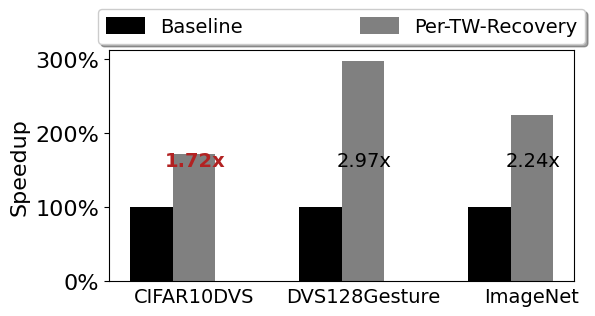

In [ ]:
# 字体设置
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']

from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(6, 3))
bar_width = 0.25
index = np.arange(3)
mode_indexes = []

unique_mode = ['Baseline', 'Per-TW-Recovery']
unique_energy_key = ['core', 'buffer', 'dram', 'popcnt']

# mode: Baseline
for idx, mode in enumerate(unique_mode):
    bottom = np.zeros(3)
    # plot total energy for each mode, which normalized to Baseline
    if mode == 'Baseline':
        plt.bar(index + (idx - 1) * bar_width, np.ones(3), bar_width, bottom=bottom, label=mode, color="black")
    if mode == 'Per-TW-Recovery':
        plt.bar(index + (idx - 1) * bar_width, recovery_sim_results['speedup_vs_baseline'], bar_width, bottom=bottom, label=mode, color="grey")
        ee = np.array(recovery_sim_results['speedup_vs_baseline']).astype(float)
        plt.text(index[0] + (idx - 1) * bar_width +0.01, 1.5, f'{ee[0]:.2f}x', ha='center', va='bottom', fontsize=14, color='firebrick', fontweight='bold')
        plt.text(index[1] + (idx - 1) * bar_width +0.01, 1.5, f'{ee[1]:.2f}x', ha='center', va='bottom', fontsize=14, color='k')
        plt.text(index[2] + (idx - 1) * bar_width +0.007, 1.5, f'{ee[2]:.2f}x', ha='center', va='bottom', fontsize=14, color='k')

plt.xticks([])
plt.legend(["Baseline", "Per-TW-Recovery"], fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.22),
                 fancybox=True, shadow=True, ncol=3, labelspacing=1.0, handleheight=1.0, columnspacing=6)

dataset_names = sorted(recovery_sim_results['Network'].unique())
for i, dataset_name in enumerate(dataset_names):
    if dataset_name == 'CIFAR10SNN':
        dataset_name = 'CIFAR10DVS'
    elif dataset_name == 'ImageNetSNN':
        dataset_name = 'ImageNet'
    plt.annotate(dataset_name, (index[i], 0), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=14)

plt.ylabel("Speedup")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.savefig('speedup.pdf', bbox_inches='tight', dpi=300)

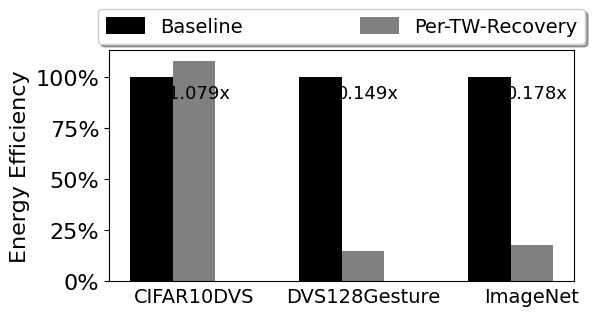

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(6, 3))
bar_width = 0.25
index = np.arange(3)
mode_indexes = []

unique_mode = ['Baseline', 'Per-TW-Recovery']

energydown = recovery_sim_results['energydown_vs_baseline']
# energydown = [0.993, 0.990, 0.993]

# mode: Baseline
for idx, mode in enumerate(unique_mode):
    bottom = np.zeros(3)
    # plot total energy for each mode, which normalized to Baseline
    if mode == 'Baseline':
        bar = plt.bar(index + (idx - 1) * bar_width, np.ones(3), bar_width, bottom=bottom, label=mode, color="black")
    if mode == 'Per-TW-Recovery':
        plt.bar(index + (idx - 1) * bar_width, energydown, bar_width, bottom=bottom, label=mode, color="grey")
        ee = np.array(energydown).astype(float)
        plt.text(index[0] + (idx - 1) * bar_width + 0.03, 0.88, f'{ee[0]:.3f}x', ha='center', va='bottom', fontsize=13, color='k')
        plt.text(index[1] + (idx - 1) * bar_width + 0.03, 0.88, f'{ee[1]:.3f}x', ha='center', va='bottom', fontsize=13, color='k')
        plt.text(index[2] + (idx - 1) * bar_width + 0.03, 0.88, f'{ee[2]:.3f}x', ha='center', va='bottom', fontsize=13, color='k')

plt.xticks([])
plt.legend(["Baseline", "Per-TW-Recovery"], fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.22),
                 fancybox=True, shadow=True, ncol=3, labelspacing=1.0, handleheight=1.0, columnspacing=6)

dataset_names = sorted(recovery_sim_results['Network'].unique())
for i, dataset_name in enumerate(dataset_names):
    if dataset_name == 'CIFAR10SNN':
        dataset_name = 'CIFAR10DVS'
    elif dataset_name == 'ImageNetSNN':
        dataset_name = 'ImageNet'
    plt.annotate(dataset_name, (index[i], 0), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=14)

plt.ylabel("Energy Efficiency")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.savefig('energy_efficiency.pdf', bbox_inches='tight', dpi=300)